In [22]:
import sionna as sn
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [77]:
BATCH_SIZE = 10
NUM_BITS_PER_SYMBOL = 4
EBNO_DB = 0
CODERATE = 0.5
NUM_CODED_BITS = 1000
NUM_INFO_BITS = int(NUM_CODED_BITS * CODERATE)

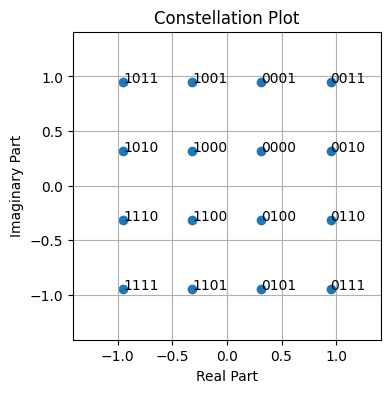

In [78]:
constellation = sn.mapping.Constellation('qam', NUM_BITS_PER_SYMBOL)
constellation.show(figsize=(4,4));

In [79]:
binary_source = sn.utils.BinarySource()

mapper = sn.mapping.Mapper(constellation=constellation)
demapper = sn.mapping.Demapper('app', constellation=constellation)

ldpc_encoder = sn.fec.ldpc.LDPC5GEncoder(NUM_INFO_BITS, NUM_CODED_BITS)
ldpc_decoder = sn.fec.ldpc.LDPC5GDecoder(encoder=ldpc_encoder, hard_out=True)

polar_encoder = sn.fec.polar.Polar5GEncoder(NUM_INFO_BITS, NUM_CODED_BITS)
polar_decoder = sn.fec.polar.Polar5GDecoder(enc_polar=polar_encoder, dec_type='SCL')

awgn = sn.channel.AWGN()
no = sn.utils.ebnodb2no(
    coderate=CODERATE,
    ebno_db=EBNO_DB,
    num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
)

In [80]:
bits = binary_source([BATCH_SIZE, NUM_INFO_BITS])
code_words = ldpc_encoder(bits)
symbols = mapper(code_words)
received_symbols = awgn([symbols, no])
llr = demapper([received_symbols, no])
bits_hat = ldpc_decoder(llr)

In [81]:
print(f'BER: {np.sum(abs(bits-bits_hat))/np.size(bits)}')

BER: 0.2696


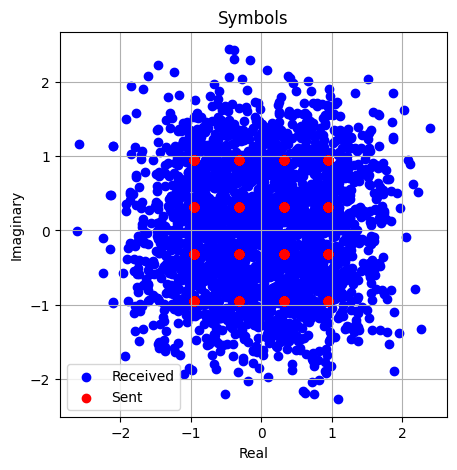

In [83]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(received_symbols), np.imag(received_symbols), color='b')
plt.scatter(np.real(symbols), np.imag(symbols), color='r')
plt.legend(['Received', 'Sent'])
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Symbols')
plt.show()